<font size = "3">

**(Q1)** Make the following changes to the `Fraction` class from Lecture 1.

1. Modify the `__init__` method so that if a user creates a `Fraction` instance with a negative denominator, it returns an equivalent fraction with a positive denominator.

2. Remove the code that uses `gcd` to reduce a `Fraction` to lowest terms from the `__add__` method and add it to the `__init__` method instead. That is, anytime a `Fraction` instance is created, it is automatically put in reduced form.

3. Implement the following remaining simple arithmetic operators to the `Fraction` class: `__sub__`, `__mul__`, and `__truediv__`.

4. Implement the relational operators ``__gt__``, ``__ge__``, ``__lt__``, ``__le__``, and ``__ne__``.


In [1]:
class Fraction:
    """Class Fraction"""
    def __init__(self, num, den):
        if den < 0:
            num = -num 
            den = -den

        common = gcd(num, den)

        # integer division
        self.num = num // common
        self.den = den // common

    def show(self):
        print(f"{self.num}/{self.den}")

    def __str__(self):
        return f"{self.num}/{self.den}"

    def __repr__(self):
        return f"Fraction(num='{self.num}', den='{self.den}')"

    def __add__(self, other_fraction):
        new_num = self.num * other_fraction.den + \
            self.den * other_fraction.num
        new_den = self.den * other_fraction.den 

        return Fraction(new_num, new_den)

    def __sub__(self, other_fraction):
        new_num = self.num * other_fraction.den - \
            self.den * other_fraction.num
        new_den = self.den * other_fraction.den 
        
        return Fraction(new_num, new_den)

    def __mul__(self, other_fraction):
        new_num = self.num * other_fraction.num 
        new_den = self.den * other_fraction.den 
        return Fraction(new_num, new_den)

    def __truediv__(self, other_fraction):
        new_num = self.num * other_fraction.den 
        new_den = self.den * other_fraction.num 
        return Fraction(new_num, new_den)

    def __eq__(self, other_fraction):
        first_num = self.num * other_fraction.den 
        second_num = other_fraction.num * self.den
        return first_num == second_num

    def __gt__(self, other_fraction):
        # both denominators being positive makes this easier!
        return self.num * other_fraction.den > self.den * other_fraction.num

    def __ge__(self, other_fraction):
        # both denominators being positive makes this easier!
        return self.num * other_fraction.den >= self.den * other_fraction.num

    def __lt__(self, other_fraction):
        return not self.__ge__(other_fraction)

    def __le__(self, other_fraction):
        return not self.__gt__(other_fraction)

    def __ne__(self, other_fraction):
        return not self.__eq__(other_fraction)


def gcd(m, n):
    # Euclid's algorithm
    # valid when n > 0
    while m % n != 0:
        m, n = n, m % n
    return n

<font size = "3">

**(Q2)** The circuit simulation from lecture 1 works in a backward direction. In other words, given a circuit, the ouptut is produced by working back through the input values, which in turn cause other outputs to be queried. The continues until the external input lines are found, at which point the user is asked for values. Modify the implementation so that the action is in the forward direction; upon receiving inputs the circuit produces an output.

**Hint**: You may develop another way to solve this problem, but I will outline a couple changes I made to develop my solution.

1. I changed the `LogicGate` class to have three attributes: `self.label`, `self.output`, and `self.pin_out`.

2. I changed the `LogicGate` class to have two methods: `send_output(self)` and `set_pin_out(self, target)`

3. I added another attribute to the `Connector` class: `self.value` which holds the output coming out of the "from gate".

4. I wrote a new `Circuit` class that contains a sequence of gates making up the circuit. 

5. After making all of my changes, I executed the circuit with the code below

In [2]:
##############################   Logic Gate
class LogicGate:
    def __init__(self, lbl):
        self.label = lbl
        self.output = None
        self.pin_out = None

    def send_output(self):
        self.output = self.perform_gate_logic()
        if self.pin_out == None:
            print(self.output)
        else:
            # send to connector
            self.pin_out.get_value(self.output)

    def set_pin_out(self, target):
        if self.pin_out == None:
            self.pin_out = target
        else:
            raise RuntimeError("Error: Output pin for gate " + self.label + " is not available!")
############################## 

##############################  Binary Gate
class BinaryGate(LogicGate):
    def __init__(self, lbl):
        super().__init__(lbl)
        self.pin_a = None
        self.pin_b = None

    def get_input_a(self):
        if self.pin_a == None:
            # no Connector is attached
            return int(input(f"Enter pin A input for gate {self.label}: "))
        else:
            return self.pin_a.value

    def get_input_b(self):
        if self.pin_b == None:
            return int(input(f"Enter pin B input for gate {self.label}: "))
        else:
            return self.pin_b.value

    def set_pin(self, source):
        if self.pin_a == None:
            self.pin_a = source
        elif self.pin_b == None:
            self.pin_b = source
        else:
            raise RuntimeError("Error: NO AVAILABLE PINS")
############################## 

##############################  Unary Gate
class UnaryGate(LogicGate):
    def __init__(self, lbl):
        super().__init__(lbl)
        self.pin = None

    def get_input(self):
        if self.pin == None:
            return int(input(f"Enter pin input for gate {self.label}: "))
        else:
            return self.pin.value

    def set_pin(self, source):
        if self.pin == None:
            self.pin = source 
        else:
            raise RuntimeError("Error: PIN IS NOT AVAILABLE")
##############################

##############################  Connector
class Connector:
    def __init__(self, from_gate, to_gate):
        self.from_gate = from_gate 
        self.to_gate = to_gate
        self.value = None

        from_gate.set_pin_out(self)
        to_gate.set_pin(self)

    def get_value(self, val):
        self.value = val
##############################

##############################  And Gate
class AndGate(BinaryGate):
    def __init__(self, lbl):
        super().__init__(lbl)
    
    def perform_gate_logic(self):
        a = self.get_input_a()
        b = self.get_input_b()
        return a*b
##############################

##############################  Or Gate
class OrGate(BinaryGate):
    def __init__(self, lbl):
        super().__init__(lbl)

    def perform_gate_logic(self):
        a = self.get_input_a()
        b = self.get_input_b()
        return max(a, b)
##############################


############################## Not Gate
class NotGate(UnaryGate):
    def __init__(self, lbl):
        super().__init__(lbl)

    def perform_gate_logic(self):
        x = self.get_input()
        return (x + 1) % 2
##############################
 
############################## Circuit
class Circuit:
    def __init__(self, gate_sequence):
        self.sequence = gate_sequence 
                
    def run_circuit(self):
        for level in self.sequence:
            for gate in level:
                gate.send_output()
##############################


In [3]:
g1 = AndGate("G1")
g2 = AndGate("G2")
g3 = OrGate("G3")
g4 = NotGate("G4")

c1 = Connector(g1, g3)
c2 = Connector(g2, g3)
c3 = Connector(g3, g4)

level_1 = [g1, g2]
level_2 = [g3]
level_3 = [g4]
sequence = [level_1, level_2, level_3]

circuit = Circuit(sequence)

circuit.run_circuit()

0


<font size = "3">

**(Q3)** Consider the problem of solving an $n\times n$ lower-triangular system of equations $L\mathbf{x} = \mathbf{b}$, where $\mathbf{x}$ is unknown.

$$
\underbrace{\begin{bmatrix}
\ell_{11} & 0         & \cdots & 0 \\
\ell_{21} & \ell_{22} & \ddots & \vdots \\
\vdots    & \vdots    & \ddots & 0 \\
\ell_{n1} & \ell_{n2} & \cdots & \ell_{nn}
\end{bmatrix}}_{L}
\underbrace{\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{bmatrix}}_{\mathbf{x}}
=
\underbrace{\begin{bmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{bmatrix}}_{\mathbf{b}}.
$$

We assume $\ell_{ii} \neq 0$ for every $i = 1, 2, \dots, n$ so that a unique solution exists.

The *forward-substitution* algorithm can be used to compute the solution as follows:

$$\begin{align*}
x_1 &= \frac{b_1}{\ell_{11}}\\[2pt]
x_2 &= \frac{b_2 - \ell_{21}x_1}{\ell_{22}}\\
x_3 &= \frac{b_3 - \ell_{31}x_1 - \ell_{32}x_2}{\ell_{33}}\\
&\vdots\\
x_i &= \frac{b_i - \sum_{j=1}^{i-1}\ell_{ij}x_j}{\ell_{ii}}\\
&\vdots\\
x_n &= \frac{b_n - \sum_{j=1}^{n-1}\ell_{ij}x_j}{\ell_{nn}}
\end{align*}




1. Implement the forward substitution algorithm as a function `solve_lower_triangular(L, b)`

2. How many operations does your implementation require? "Operations" include assignnents, addition/subtraction, and multiplication/division. Briefly explain how you arrived at your answer.

3. What is the computational cost of the algorithm in terms of "Big-Oh" notation?

4. Verify your answer to part 3 empirically using the `timeit` library for different values of `n`

In [4]:
# Here's a good way to create lower triangular systems with unique solutions
import numpy as np 

n = 50 

L = np.tril(np.random.randn(n,n))
L += np.diag(5*(np.random.rand(n,) + 1)) # ensure matrix is "sufficiently" non-singular

b = np.random.randn(n,)

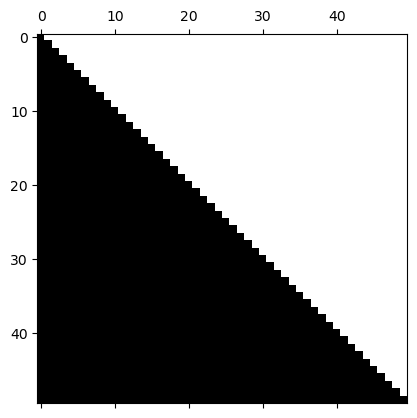

In [5]:
# Here's how you can visually check a matrix is lower triangular

import matplotlib.pyplot as plt 

# Black = non-zero elements
plt.spy(L)
plt.show()

In [6]:
# Solution 
def solve_triangular(L, b):
    n = b.size
    x = np.zeros(n,) 
    for i in range(n):
        x[i] = b[i] 
        for j in range(i):
            x[i] -= L[i,j]*x[j]
        x[i] /= L[i,i]
    return x

In [7]:
# Here's how you can test if your function was implemented correctly
n = 50

L = np.tril(np.random.randn(n,n))
L += np.diag(5*(np.random.rand(n,) + 1)) # ensure matrix is "sufficiently" non-singular

x_true = np.ones(n,)
b = L @ x_true 

my_x = solve_triangular(L, b)

# true solution should be all ones... should get a really small number here
print(max(abs(my_x - 1)))

1.5543122344752192e-15


<font size = "3">


```python
    def solve_triangular(L, b):
        n = b.size  # 1 assignment

        # Ambiguous... is this next line n assignments or 1 assignment?
        x = np.zeros(n,)  
        # It could be the case that this is just as expensive as n scalar assignments,
        #   so we should count it as n assignments
        # But NumPy developers could have come up with some optimizations 
        #   that reduce the cost. But how much optimization is possible?
        # Best I can say: 1 ≤ # of assignments ≤ n

        for i in range(n):
            x[i] = b[i]  # 1 assignment * n passes = n assignments
            for j in range(i):
                # Pass through this loop:
                # 0 times for i = 0
                # 1 time for i = 1
                # 2 times for i = 2
                # ...
                # n-1 times for i = n-1
                # Total passes through loop = 1 + 2 + ... + n - 1 = (n-1)*n / 2

                x[i] -= L[i,j]*x[j] # 1 multiplication, 1 subtraction, 1 assignment
                
                # Cost of inner loop = 3 * (n-1) * n / 2 operations

            # 1 division, 1 assignment = 2 operations
            # 2 operations * n passes = 2n operations
            x[i] /= L[i,i] 

        return x
```

<font size = "4">

Operation count:

- Innermost loop: $\frac{3(n-1)n}{2}$ operations

- Outer loop: $3n$ operations

- Outside the loop, best case: 2 operations.

- Outside the loop, worst case: $n + 1$ operations

So minimum operation count is:

$$ 2 + 3n + \frac{3(n-1)n}{2} = 2 + \frac{3n(n+1)}{2}$$

And maximum operation count is:

$$ 1 + 4n + \frac{3(n-1)n}{2} = 1 + \frac{n(3n+5)}{2}$$


**In either case**, the computational cost is $\mathcal{O}(n^2)$


In [8]:
from timeit import timeit

n_vals = [100, 200, 400, 800]
avg_time = []
num_repeats = 50

for n in n_vals:
    L = np.tril(np.random.randn(n,n)) + np.diag(5*(np.random.rand(n,) + 1))
    b = L @ np.ones(n,)

    total_time = timeit(stmt = "f(L,b)", number = num_repeats, 
        globals = {"f" : solve_triangular, "L" : L, "b" : b})
    avg_time.append(total_time/num_repeats)
    print(f"For n = {n}, the average time was {total_time/num_repeats} seconds")


For n = 100, the average time was 0.0016138108400627971 seconds
For n = 200, the average time was 0.00565202666039113 seconds
For n = 400, the average time was 0.02257670581981074 seconds
For n = 800, the average time was 0.09481805083982181 seconds


In [9]:
# Every time we double the problem size, the cost should increase
#   by a factor of roughly 4, if the algorithm is O(n^2)

# The factor of increase should be closer to 4 as the problem size grows.

print(avg_time[1]/avg_time[0])
print(avg_time[2]/avg_time[1])
print(avg_time[3]/avg_time[2])

3.502285720283795
3.99444432525879
4.199817794348913


<font size = "4">

**(Q4)** Consider the function $f(n) = \frac{2}{3}n^2 + 500n + 50$. 

- Using the precise definition of $\mathcal{O}(\cdot)$, show that $f(n) = \mathcal{O}(n^2)$

- Using the precise definition of $\mathcal{\Theta}(\cdot)$, show that $f(n) = \mathcal{\Theta}(n^2)$

<font size = "4">

**Solution:** First, note that both $f(n)$ and $n^2$ are positive functions, so we can disregard absolute values. Next, we have

$$\frac{f(n)}{n^2} = \frac{2}{3} + \frac{500}{n} + \frac{50}{n^2}$$

**part (a)**

When $n \geq 500$, it follows that:

$$\frac{2}{3} + \frac{500}{n} + \frac{50}{n^2} \leq \frac{2}{3} + 1 + \frac{1}{5000} < \frac{2}{3} + 1 + \frac{1}{3} = 2$$

So we obtain

$$ \frac{f(n)}{n^2} \leq 2\qquad \textrm{when } n \geq 500$$

or 

$$f(n) \leq 2\cdot n^2\qquad \textrm{when } n \geq 500$$

By definition, this implies $f(n) = \mathcal{O}(n^2)$

**part (b)**

For any $n \geq 1$, we have:

$$\frac{2}{3} + \frac{500}{n} + \frac{50}{n^2} > \frac{2}{3} + 0 + 0 = \frac{2}{3}$$

So we obtain

$$ \frac{2}{3} \leq \frac{f(n)}{n^2}\qquad \textrm{when } n \geq 1$$

or 

$$ \frac{2}{3}n \leq f(n)\qquad \textrm{when } n \geq 1$$

By definition, this implies $f(n) = \mathcal{\Omega}(n^2)$

Combining this with the fact that $f(n) = \mathcal{O}(n^2)$, it follows that $f(n) = \mathcal{\Theta}(n^2)$

<font size = "3">

**(Q5)** Implement a class `TransformHistory` that contains a Pandas `DataFrame` object along with an "undo_stack" and a "redo_stack". This class allows a user to apply a sequence of transformations to a DataFrame while providing a mechanism for undoing/redoing transformations. The outline of the class is below (using the `Stack` class from Lecture 4).

**Hint:** Think of the "Back" and "Forward" options in your browser, or the "undo" "redo" features when writing a word document.

In [14]:
# solution
from datasci531 import Stack

class TransformHistory:
    def __init__(self, df):
        self.data = df.copy()
        self.undo_stack = Stack()
        self.redo_stack = Stack()

    def set_data(self, df):
        """Set the working DataFrame
        - overwrite self.data with a copy of df
        - reset both undo and redo stacks"""
        self.data = df.copy() 

        while not self.undo_stack.is_empty():
            self.undo_stack.pop()
        while not self.redo_stack.is_empty():
            self.redo_stack.pop()

    def apply(self, fn):
        """ Apply the transformation fn to the DataFrame
        - Clear the redo stack
        - Add a copy of the current data to the undo stack
        - Overwrite the current data by applying the 
            transformation to a copy of the current data"""
        while not self.redo_stack.is_empty():
            self.redo_stack.pop()
        self.undo_stack.push(self.data.copy())
        self.data = fn(self.data.copy())


    def undo(self):
        """Undo the most recent transformation.
        If there is no transformation to undo, leave
        data unchanged"""
        if not self.undo_stack: # remember "truthy" and "falsy"
            return None 
        self.redo_stack.push(self.data.copy())
        self.data = self.undo_stack.pop()

    def redo(self):
        """Redo the most recent 'undone' transformation.
        If there is no transformation to redo, leave
        data unchanged""" 
        if not self.redo_stack:
            return None 
        self.undo_stack.push(self.data.copy())
        self.data = self.redo_stack.pop()

<font size = "3">

See below for example usage of the `TransformHistory` class.

In [16]:
import pandas as pd

def add_y(d):
    return d.assign(y=d["x"] + 10)

def filter_ge_2(d):
    return d.query("x >= 2")


# initialize with empty DataFrame
h = TransformHistory(pd.DataFrame())

# replace with simple 1-column data frame
h.set_data(pd.DataFrame({"x": [1, 2, 3]}))

h.apply(add_y)
print(h.data, "\n")
#     x   y
# 0   1  11
# 1   2  12
# 2   3  13

h.apply(filter_ge_2)
print(h.data, "\n")
#     x   y
# 1   2  12
# 2   3  13

h.undo()
print(h.data, "\n")
#     x   y
# 0   1  11
# 1   2  12
# 2   3  13

h.redo()
print(h.data, "\n")
#     x   y
# 1   2  12
# 2   3  13

   x   y
0  1  11
1  2  12
2  3  13 

   x   y
1  2  12
2  3  13 

   x   y
0  1  11
1  2  12
2  3  13 

   x   y
1  2  12
2  3  13 

